# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

# Dataset import and split

Classic dataset split into 3 sets. Also we initialize two scalers to transform our train and validation data. 

In [2]:
train_data  = pd.read_csv('train.csv')
eval_data = pd.read_csv('evaluate.csv')

In [3]:
X = train_data.drop(columns=['label'])
y = train_data['label']

random_seed = 666
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=random_seed)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=random_seed)
print("Train data size:", len(Xtrain))
print("Validation data size:", len(Xval))
print("Test data size:", len(Xtest))

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# --- standard scaling  -----
Xtrain_standard = standard_scaler.fit_transform(Xtrain)
Xtrain_standard = pd.DataFrame(Xtrain_standard, columns=Xtrain.columns)
Xval_standard = standard_scaler.transform(Xval)
Xval_standard = pd.DataFrame(Xval_standard, columns=Xval.columns)


# ---- min max scaling -------
Xtrain_min_max = min_max_scaler.fit_transform(Xtrain)
Xtrain_min_max = pd.DataFrame(Xtrain_min_max, columns=Xtrain.columns)

Xval_min_max = min_max_scaler.transform(Xval)
Xval_min_max = pd.DataFrame(Xval_min_max, columns=Xval.columns)

Train data size: 1350
Validation data size: 450
Test data size: 600


### Basic description od dataset

We can see total 2400 data points with 785 total, where 784 columns are individual pixels. Also there is no missing values in this dataset. 

In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB
None


In [5]:
missing_values = train_data.isna().any().any()
if missing_values:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [6]:
print(train_data['label'].value_counts())

label
0    1238
1    1162
Name: count, dtype: int64


In [96]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.values.reshape(28, 28), cmap='gray')
    plt.title('Label: ' + str(label))
    plt.show()

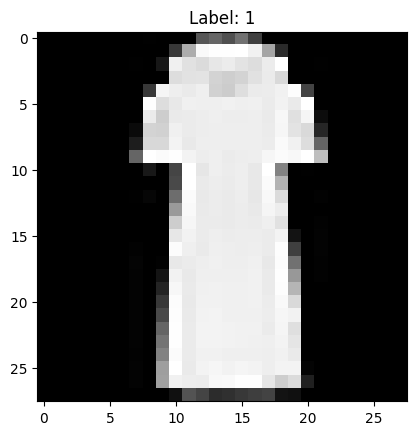

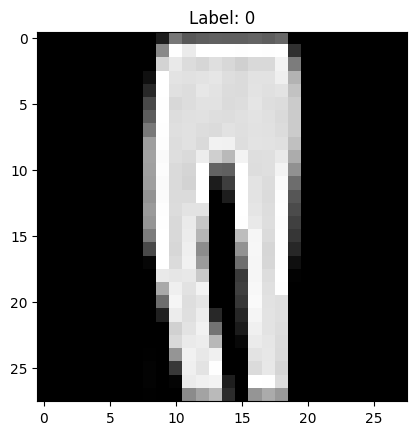

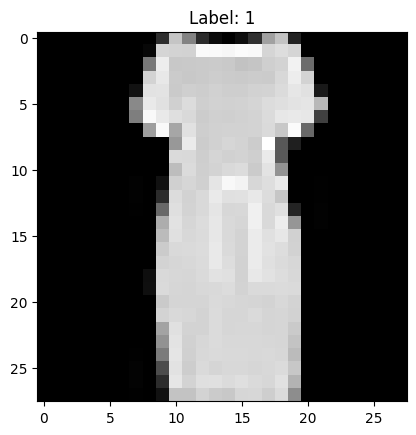

In [97]:
random_indices = train_data.sample(3).index
for index in random_indices:
    show_image(train_data.iloc[index, 1:], train_data.iloc[index, 0])

### Checking dataset by 2D plot

I really liked how cool it looked, so I took this code snippet to visualize our data. [source code](https://www.kaggle.com/code/ohseokkim/base-denoising-autoencoder-dimension-reduction). 
Uniform Manifold Approximation and Projection (UMAP) is a technique for visualizing high-dimensional data in lower-dimensional spaces. In our case we can see 2 clusters with several data points overlapping between other group. So it should be not difficult to predict our values correctly and with high accuracy.

<Axes: >

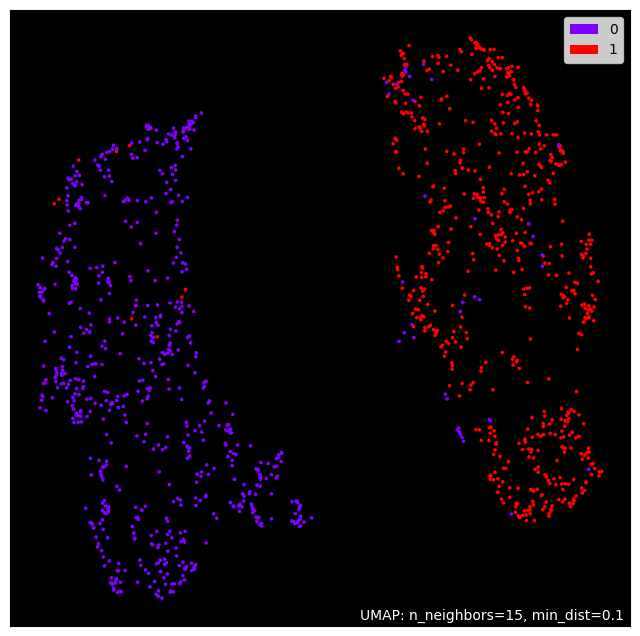

In [7]:
import umap.plot

mapper_org = umap.UMAP().fit(Xtrain)
umap.plot.points(mapper_org, labels=Ytrain, theme='fire')

## SVM without dimension reduction

Suitability of the SVM:
* SVMs work well when the classes are linearly separable
* Even if the classes are not linearly separable, SVMs can still perform effectively by using non-linear kernels such as radial basis function (RBF) or polynomial kernels. From training results I may suggest that our dataset is not perfectly linearly separable
* Our dataset consists of 28x28 pixel images, resulting in a high-dimensional feature space, so SVM can struggle with increased computational complexity.

In [9]:
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC
import numpy as np

C_values = [*map(lambda x: x/10.0, range(10,200, 2))]
svc_param_grid = {
    'C': C_values,
    'kernel': ['rbf', 'poly']
}
svc_params_comb = ParameterGrid(svc_param_grid)

In [22]:
best_params_svc_orig = None
best_accuracy_svc_orig = 0

for params in svc_params_comb:
    svm_model = SVC(**params, random_state=random_seed)
    svm_model.fit(Xtrain, Ytrain)
    predictions = svm_model.predict(Xval)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_svc_orig:
        best_accuracy_svc_orig = accuracy
        best_params_svc_orig = params

In [23]:
best_params_svc_standard = None
best_accuracy_svc_standard = 0

for params in svc_params_comb:
    svm_model = SVC(**params, random_state=random_seed)
    svm_model.fit(Xtrain_standard, Ytrain)
    predictions = svm_model.predict(Xval_standard)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_svc_standard:
        best_accuracy_svc_standard = accuracy
        best_params_svc_standard = params

In [24]:
best_params_svc_minmax = None
best_accuracy_svc_minmax = 0

for params in svc_params_comb:
    svm_model = SVC(**params, random_state=random_seed)
    svm_model.fit(Xtrain_min_max, Ytrain)
    predictions = svm_model.predict(Xval_min_max)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_svc_minmax:
        best_accuracy_svc_minmax = accuracy
        best_params_svc_minmax = params

#### Training results

The results suggest that scaling the dataset (both standard scaling and min-max scaling) had a minor impact on model performance. In this case, since scaling had a little to none impact on performance and the original dataset performed well, using the original unscaled dataset may be a reasonable choice for simplicity and interpretability.

In [25]:
print(f"SVC Results:\n")

print("="*len("Original dataframe"))
print(f"Original dataframe:\n"
      f"Best accuracy on validation data: {best_accuracy_svc_orig}\n"
      f"Best hyperparameters: {best_params_svc_orig}\n")

print("="*len("Standard scaled dataframe"))
print(f"Standard scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_svc_standard:}\n"
      f"Best hyperparameters: {best_params_svc_standard}\n")

print("="*len("Minmax scaled dataframe"))
print(f"Minmax scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_svc_minmax:}\n"
      f"Best hyperparameters: {best_params_svc_minmax}\n")

SVC Results:

Original dataframe:
Best accuracy on validation data: 0.9822222222222222
Best hyperparameters: {'C': 7.8, 'kernel': 'rbf'}

Standard scaled dataframe
Best accuracy on validation data: 0.9711111111111111
Best hyperparameters: {'C': 18.6, 'kernel': 'poly'}

Minmax scaled dataframe
Best accuracy on validation data: 0.98
Best hyperparameters: {'C': 2.0, 'kernel': 'poly'}


## Naive Bayes without dimension reduction

Suitability of the NB:
* Can handle high-dimensional data well, making it suitable for datasets with a large number of features
* Is computationally efficient and scales well with the size of the dataset and the number of features
* In our case the assumption of feature independence may not hold true. In images, adjacent pixels are often correlated, and the presence or absence of a certain pixel value can indeed impact the neighboring pixels. Therefore, the assumption of feature independence is violated in this scenario. But Naive Bayes classifiers are relatively robust and can often handle violations of the independence assumption to some extent

Firstly I will try GaussianNB on original and scaled dataset. For GaussianNB, scaling the features using standard scaling or min-max scaling typically does not provide significant benefits. But for the sake of curiosity we will see

Other possibility is to use Categorical NB. But since our dataset consists of pixel values, which are continuous, rather than categorical features, CategoricalNB may not be the most appropriate choice. However, again for the sake of curiosity, I will try it. 

From the results we can see that SVC outperforms Naive Bayes for current task. And that CategoricalNB is better than GaussianNB. I used KBinsDiscretizer to discretize continuous features into discrete bins, which can then be used as input to the CategoricalNB classifier. 

In [35]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import KBinsDiscretizer

clf = GaussianNB()
clf.fit(Xtrain, Ytrain)
predictions = clf.predict(Xval)
accuracy_original = accuracy_score(Yval, predictions)

clf = GaussianNB()
clf.fit(Xtrain_standard, Ytrain)
predictions = clf.predict(Xval_standard)
accuracy_standard= accuracy_score(Yval, predictions)

clf = GaussianNB()
clf.fit(Xtrain_min_max, Ytrain)
predictions = clf.predict(Xval_min_max)
accuracy_minmax= accuracy_score(Yval, predictions)

print(f"Naive gaussian bayes results:")
print("="*len("Naive gaussian bayes results:"))
print(f"Best accuracy on validation original data: {accuracy_original:.4f}")
print(f"Best accuracy on validation standard scaled data: {accuracy_standard:.4f}")
print(f"Best accuracy on validation min max scaled data: {accuracy_minmax:.4f}\n")

import warnings
warnings.filterwarnings("ignore")
clf = CategoricalNB()
best_accuracy_categoricalnb = 0
best_n_bins = 0
for i in range(2, 256, 2):
    kbins = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='uniform')
    Xtrain_binned = kbins.fit_transform(Xtrain)
    Xval_binned = kbins.transform(Xval)
    clf.fit(Xtrain_binned, Ytrain)
    predictions = clf.predict(Xval_binned)
    accuracy_binned = accuracy_score(Yval, predictions)
    if accuracy_binned > best_accuracy_categoricalnb:
        best_accuracy_categoricalnb = accuracy_binned
        best_n_bins = i
        
print("\nNaive Categorical Bayes results:")
print("="*len("Naive Categorical Bayes results:"))
print(f"Accuracy on validation data (binned): {best_accuracy_categoricalnb:.4f}")
print(f"Best number of bind: {best_n_bins}")

Naive gaussian bayes results:
Best accuracy on validation original data: 0.8956
Best accuracy on validation standard scaled data: 0.8689
Best accuracy on validation min max scaled data: 0.8667

Naive Categorical Bayes results:
Accuracy on validation data (binned): 0.9467
Best number of bind: 140


## LDA without dimension reduction

Suitability of LDA:
* is computationally efficient and can scale well to large datasets. Without the additional step of dimension reduction, the training and prediction times are relatively fast
* While LDA can be used without dimension reduction, it's worth considering whether reducing the dimensionality of our dataset could improve classification performance


In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_solvers = ['svd', 'lsqr']

In [90]:
best_params_lda_orig = None
best_accuracy_lda_orig = 0

for solver in lda_solvers:
    lda_model = LinearDiscriminantAnalysis(solver=solver)
    lda_model.fit(Xtrain, Ytrain)
    predictions = lda_model.predict(Xval)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_lda_orig:
        best_accuracy_lda_orig = accuracy
        best_params_lda_orig = solver   

In [91]:
best_params_lda_standard = None
best_accuracy_lda_standard = 0

for solver in lda_solvers:
    lda_model = LinearDiscriminantAnalysis(solver=solver)
    lda_model.fit(Xtrain_standard, Ytrain)
    predictions = lda_model.predict(Xval_standard)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_lda_standard:
        best_accuracy_lda_standard = accuracy
        best_params_lda_standard = solver   

In [92]:
best_params_lda_minmax = None
best_accuracy_lda_minmax = 0

for solver in lda_solvers:
    lda_model = LinearDiscriminantAnalysis(solver=solver)
    lda_model.fit(Xtrain_min_max, Ytrain)
    predictions = lda_model.predict(Xval_min_max)
    accuracy = accuracy_score(Yval, predictions)
    if accuracy > best_accuracy_lda_minmax:
        best_accuracy_lda_minmax = accuracy
        best_params_lda_minmax = solver 

#### Training results

As we can see from results LDA is not affected by feature scaling, although standardizing the features can sometimes improve the convergence speed of optimization algorithms. While LDA showed competitive performance, SVC model exhibited higher accuracies on the validation data

In [93]:
print(f"LDA Results:\n")

print("="*len("Original dataframe"))
print(f"Original dataframe:\n"
      f"Best accuracy on validation data: {best_accuracy_lda_orig:}\n"
      f"Best hyperparameters: {best_params_lda_orig}\n")

print("="*len("Standard scaled dataframe"))
print(f"Standard scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_lda_standard:}\n"
      f"Best hyperparameters: {best_params_lda_standard}\n")

print("="*len("Minmax scaled dataframe"))
print(f"Minmax scaled dataframe\n"
      f"Best accuracy on validation data: {best_accuracy_lda_minmax:}\n"
      f"Best hyperparameters: {best_params_lda_minmax}\n")

LDA Results:

Original dataframe:
Best accuracy on validation data: 0.9111111111111111
Best hyperparameters: svd

Standard scaled dataframe
Best accuracy on validation data: 0.9111111111111111
Best hyperparameters: svd

Minmax scaled dataframe
Best accuracy on validation data: 0.9111111111111111
Best hyperparameters: svd


## SVM with dimension reduction 

Now we will try to reduce dimension. Firstly I will try PCA on different number of components. Based on results above there was no improvement in scaled dataset, so I would not use them.

I will limit number of component to 79 in this code snippet. Because I tried larger intervals and it did not show any significant improvement and it would take so much more time to train it.

In [15]:
from sklearn.decomposition import PCA

best_accuracy_svm_pca = 0
best_params_svm_pca = {}

C_values_pca = [*map(lambda x: x/10.0, range(10,200, 2))]
svc_param_grid = {
    'C': C_values_pca,
    'kernel': ['rbf', 'poly']
}
svc_params_comb = ParameterGrid(svc_param_grid)
accuracy_per_component = {}

for n_components in range(1, 80, 1):
    print(f"Trying {n_components} components")
    accuracy_per_component[n_components] = 0
    pca = PCA(n_components=n_components)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xval_pca = pca.transform(Xval)
    for svc_params in svc_params_comb:
        svm_model = SVC(**svc_params, random_state=random_seed)
        svm_model.fit(Xtrain_pca, Ytrain)
        predictions = svm_model.predict(Xval_pca)
        accuracy = accuracy_score(Yval, predictions)
        if accuracy > accuracy_per_component[n_components]:
            accuracy_per_component[n_components] = accuracy
        if accuracy > best_accuracy_svm_pca:
            print(f"New best acc:{accuracy}")
            best_accuracy_svm_pca = accuracy
            best_params_svm_pca['PCA'] = {'n_components': n_components}
            best_params_svm_pca['SVC'] = svc_params

Trying 1 components
New best acc:0.6777777777777778
New best acc:0.6822222222222222
Trying 2 components
New best acc:0.9
New best acc:0.9022222222222223
Trying 3 components
New best acc:0.96
Trying 4 components
Trying 5 components
New best acc:0.9622222222222222
New best acc:0.9644444444444444
New best acc:0.9666666666666667
Trying 6 components
New best acc:0.9688888888888889
Trying 7 components
New best acc:0.9711111111111111
New best acc:0.9733333333333334
Trying 8 components
Trying 9 components
New best acc:0.9755555555555555
Trying 10 components
New best acc:0.9777777777777777
New best acc:0.98
New best acc:0.9822222222222222
New best acc:0.9844444444444445
Trying 11 components
Trying 12 components
Trying 13 components
Trying 14 components
Trying 15 components
Trying 16 components
Trying 17 components
Trying 18 components
Trying 19 components
Trying 20 components
Trying 21 components
Trying 22 components
Trying 23 components
Trying 24 components
Trying 25 components
Trying 26 compo

In [18]:
best_accuracy_svm_pca_big = 0
best_params_svm_pca_big = {}

for n_components in range(100, 740, 10):
    print(f"Trying {n_components} components")
    pca = PCA(n_components=n_components)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xval_pca = pca.transform(Xval)
    for svc_params in svc_params_comb:
        svm_model = SVC(**svc_params, random_state=random_seed)
        svm_model.fit(Xtrain_pca, Ytrain)
        predictions = svm_model.predict(Xval_pca)
        accuracy = accuracy_score(Yval, predictions)
        if accuracy > best_accuracy_svm_pca_big:
            print(f"New best acc:{accuracy}")
            best_accuracy_svm_pca_big = accuracy
            best_params_svm_pca_big['PCA'] = {'n_components': n_components}
            best_params_svm_pca_big['SVC'] = svc_params

Trying 100 components
New best acc:0.9733333333333334
New best acc:0.9755555555555555
New best acc:0.9777777777777777
New best acc:0.98
New best acc:0.9822222222222222
New best acc:0.9866666666666667
Trying 110 components
New best acc:0.9888888888888889
Trying 120 components
Trying 130 components
Trying 140 components
New best acc:0.9911111111111112
Trying 150 components
Trying 160 components
Trying 170 components
Trying 180 components
Trying 190 components
Trying 200 components
Trying 210 components
Trying 220 components
Trying 230 components
Trying 240 components
Trying 250 components
Trying 260 components
Trying 270 components
Trying 280 components
Trying 290 components
Trying 300 components
Trying 310 components
Trying 320 components


KeyboardInterrupt: 

I stopped this, otherwise it would take a long time to finish. But we can see below that best accuracy is same on half of the components so I do not expect that it will increase even a little bit.

In [19]:
print(best_accuracy_svm_pca_big)
print(best_params_svm_pca_big)

0.9911111111111112
{'PCA': {'n_components': 140}, 'SVC': {'C': 6.4, 'kernel': 'rbf'}}


#### Plot of the best accuracy for each number of components

Based on the plot below, it's evident that the accuracy remains relatively consistent across different numbers of components. Interestingly, even with half of the 60 components, the accuracy on the validation data remains high, which can highly reduce computational needs. All in all a decrease from 784 features to only 60 is really good. Additionally we increased our best accuracy by a tiny bit. 

Red line represent best accuracy without dimension reduction

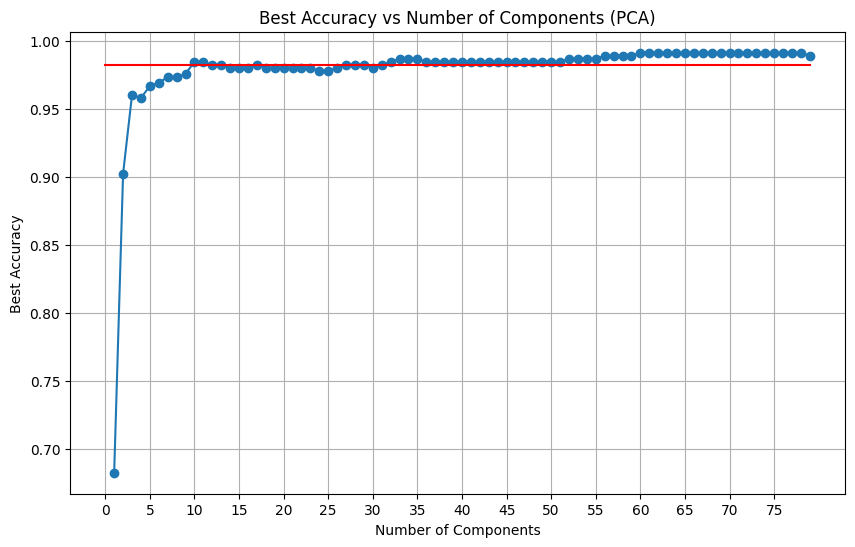

SVC with dimension reduction results (PCA):

Original dataframe:
Best accuracy on validation data: 0.9911111111111112
Best hyperparameters: {'PCA': {'n_components': 60}, 'SVC': {'C': 8.2, 'kernel': 'rbf'}}


In [33]:
components = list(accuracy_per_component.keys())
accuracies = list(accuracy_per_component.values())

plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', linestyle='-')
plt.title('Best Accuracy vs Number of Components (PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Best Accuracy')
plt.grid(True)
plt.xticks(range(0, 80, 5))
plt.plot([0, 79], [best_accuracy_svc_orig, best_accuracy_svc_orig],'r-')
plt.show()

print(f"SVC with dimension reduction results (PCA):\n")

print("="*len("Original dataframe"))
print(f"Original dataframe:\n"
      f"Best accuracy on validation data: {best_accuracy_svm_pca}\n"
      f"Best hyperparameters: {best_params_svm_pca}\n")

In [31]:
from sklearn.manifold import LocallyLinearEmbedding

best_accuracy_svm_lle = 0
best_params_svm_lle = {}

for n_components in range(2, 80, 2):
    for n_neighbors in range(5, 30, 5):
        print(f"n_components: {n_components}, n_neighbors: {n_neighbors}")
        lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
        Xtrain_lle = lle.fit_transform(Xtrain)
        Xval_lle = lle.transform(Xval)
        for svc_params in svc_params_comb:
            svm_model = SVC(**svc_params, random_state=random_seed)
            svm_model.fit(Xtrain_lle, Ytrain)
            predictions = svm_model.predict(Xval_lle)
            accuracy = accuracy_score(Yval, predictions)
            if accuracy > best_accuracy_svm_lle:
                print(f"New best acc:{accuracy}")
                best_accuracy_svm_lle = accuracy
                best_params_svm_lle['LLE'] = {'n_components': n_components, 'n_neighbors': n_neighbors}
                best_params_svm_lle['SVC'] = svc_params

n_components: 2, n_neighbors: 5
New best acc:0.9488888888888889
New best acc:0.9511111111111111
n_components: 2, n_neighbors: 10
New best acc:0.9533333333333334
n_components: 2, n_neighbors: 15
n_components: 2, n_neighbors: 20
n_components: 2, n_neighbors: 25
New best acc:0.96
New best acc:0.9622222222222222
n_components: 4, n_neighbors: 5
n_components: 4, n_neighbors: 10
New best acc:0.9644444444444444
New best acc:0.9666666666666667
New best acc:0.9688888888888889
n_components: 4, n_neighbors: 15
n_components: 4, n_neighbors: 20
n_components: 4, n_neighbors: 25
n_components: 6, n_neighbors: 5
n_components: 6, n_neighbors: 10
n_components: 6, n_neighbors: 15
n_components: 6, n_neighbors: 20
New best acc:0.9711111111111111
n_components: 6, n_neighbors: 25
n_components: 8, n_neighbors: 5
n_components: 8, n_neighbors: 10
n_components: 8, n_neighbors: 15
n_components: 8, n_neighbors: 20
n_components: 8, n_neighbors: 25
New best acc:0.9733333333333334
n_components: 10, n_neighbors: 5
n_com

Unfortunately we got worse results from LLE then from PCA. But we matched accuracy for SVC without dimension reduction. 

In [32]:
print(f"SVC with dimension reduction results (LLE):\n")

print("="*len("Original dataframe"))
print(f"Original dataframe:\n"
      f"Best accuracy on validation data: {best_accuracy_svm_lle}\n"
      f"Best hyperparameters: {best_params_svm_lle}\n")

SVC with dimension reduction results (LLE):

Original dataframe:
Best accuracy on validation data: 0.9822222222222222
Best hyperparameters: {'LLE': {'n_components': 16, 'n_neighbors': 25}, 'SVC': {'C': 8.4, 'kernel': 'rbf'}}


## Naive Bayes with dimension reduction

Now we will try to increase accuracy of naive bayes using PCA/LLE.

In [37]:
best_accuracy_nb_pca = 0
best_params_nb_pca = {}

for n_components in range(1, 700, 1):
    pca = PCA(n_components=n_components)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xval_pca = pca.transform(Xval)
    nb_pca = GaussianNB()
    nb_pca.fit(Xtrain_pca, Ytrain)
    predictions_pca = nb_pca.predict(Xval_pca)
    accuracy_pca = accuracy_score(Yval, predictions_pca)
    if accuracy_pca > best_accuracy_nb_pca:
        print(f"New best acc:{accuracy_pca}")
        best_accuracy_nb_pca = accuracy_pca
        best_params_nb_pca = n_components

New best acc:0.6911111111111111
New best acc:0.8777777777777778
New best acc:0.9244444444444444
New best acc:0.9266666666666666
New best acc:0.9311111111111111


In [39]:
best_accuracy_nb_lle = 0
best_params_nb_lle = {}

for n_components in range(2, 150, 1):
    for n_neighbors in range(5, 30, 5):
        print(f"n_components: {n_components}, n_neighbors: {n_neighbors}")
        lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
        Xtrain_lle = lle.fit_transform(Xtrain)
        Xval_lle = lle.transform(Xval)
        nb_lle = GaussianNB()
        nb_lle.fit(Xtrain_lle, Ytrain)
        predictions_lle = nb_lle.predict(Xval_lle)
        accuracy_lle = accuracy_score(Yval, predictions_lle)
        if accuracy_lle > best_accuracy_nb_lle:
            print(f"New best acc:{accuracy_lle}")
            best_accuracy_nb_lle = accuracy_lle
            best_params_nb_lle = [n_components, n_neighbors]


n_components: 2, n_neighbors: 5
New best acc:0.9533333333333334
n_components: 2, n_neighbors: 10
n_components: 2, n_neighbors: 15
n_components: 2, n_neighbors: 20
n_components: 2, n_neighbors: 25
n_components: 3, n_neighbors: 5
New best acc:0.9555555555555556
n_components: 3, n_neighbors: 10
n_components: 3, n_neighbors: 15
n_components: 3, n_neighbors: 20
n_components: 3, n_neighbors: 25
n_components: 4, n_neighbors: 5
n_components: 4, n_neighbors: 10
n_components: 4, n_neighbors: 15
n_components: 4, n_neighbors: 20
n_components: 4, n_neighbors: 25
n_components: 5, n_neighbors: 5
n_components: 5, n_neighbors: 10
n_components: 5, n_neighbors: 15
n_components: 5, n_neighbors: 20
n_components: 5, n_neighbors: 25
n_components: 6, n_neighbors: 5
New best acc:0.9577777777777777
n_components: 6, n_neighbors: 10
n_components: 6, n_neighbors: 15
n_components: 6, n_neighbors: 20
n_components: 6, n_neighbors: 25
n_components: 7, n_neighbors: 5
n_components: 7, n_neighbors: 10
n_components: 7, n_

We have achieved our best results using Naive Bayes classifiers with the help of LLE. However, we haven't yet surpassed the accuracy attained with SVC with dimension reduction

In [42]:
print(f"Naive Bayes with dimension reduction:\n")

print("PCA")
print("="*len("PCA"))
print(f"Best accuracy on validation data: {best_accuracy_nb_pca}\n"
      f"Best hyperparameters: {best_params_nb_pca}\n")
print("LLE")
print("="*len("LLE"))
print(f"Best accuracy on validation data: {best_accuracy_nb_lle}\n"
      f"Best hyperparameters: {best_params_nb_lle}\n")

Naive Bayes with dimension reduction:

PCA
===
Best accuracy on validation data: 0.9311111111111111
Best hyperparameters: 18

LLE
===
Best accuracy on validation data: 0.9711111111111111
Best hyperparameters: [13, 25]


## LDA with dimension reduction

In [47]:
best_params_lda_reduction = None
best_accuracy_lda_reduction = 0
for n_components in range(1, min(Xtrain.shape[1], len(np.unique(Ytrain))) + 1):
    for solver in lda_solvers:
        try:
            lda_model = LinearDiscriminantAnalysis(solver=solver, n_components=n_components)
            lda_model.fit(Xtrain, Ytrain)
            predictions = lda_model.predict(Xval)
            accuracy = accuracy_score(Yval, predictions)
            if accuracy > best_accuracy_lda_reduction:
                print(f"New best accuracy: {accuracy}")
                best_accuracy_lda_reduction = accuracy
                best_params_lda_reduction = {'solver': solver, 'n_components': n_components}
        except ValueError as e:
            print(f"Encountered an error: {e}")
            print(f"Ignoring n_components={n_components} for solver={solver}")  

New best accuracy: 0.9111111111111111
Encountered an error: n_components cannot be larger than min(n_features, n_classes - 1).
Ignoring n_components=2 for solver=svd
Encountered an error: n_components cannot be larger than min(n_features, n_classes - 1).
Ignoring n_components=2 for solver=lsqr
